In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize

## preprocessing

In [2]:
'''
dtypes = {'LandAverageTemperature' : 'float64', 
        'LandAverageTemperatureUncertainty' : 'float64', 
        'LandMaxTemperature' : 'float64',
        'LandMaxTemperatureUncertainty' : 'float64',
        'LandMinTemperature' : 'float64',
        'LandMinTemperatureUncertainty' : 'float64',
        'LandAndOceanAverageTemperature' : 'float64',
        'LandAndOceanAverageTemperatureUncertainty' : 'float64'}
'''

data = pd.read_csv("./data/population.csv", index_col=False, parse_dates=False)


In [3]:
data = data.groupby(["Year"]).sum()

In [ ]:
start = "2000-01-01"
end = ""
col = data['LandAverageTemperature'].loc[start:]

## generate data

In [2]:
#generate data
x = np.array(range(10))
y = 0.5*np.exp(0.5*x) + (np.random.normal(0,2,1))


#x = data.index.values
#y = data["Count"].values


## linear model

In [3]:
w = scipy.optimize.curve_fit(lambda t,a,b: a+b*t,  x,  y, (0.21,0.1))
a = w[0][0]
b = w[0][1]

## logarithmic model

In [8]:
w = scipy.optimize.curve_fit(lambda t,a,b: a+b*np.log(1+t),  x,  y, (0.21,0.1))
a = w[0][0]
b = w[0][1]

## Exponential model

In [137]:
w = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  x,  y, (0.21,0.1))
a = w[0][0]
b = w[0][1]

In [9]:
print(a,b)

-13.298227996050404 14.063293217074557


C:\Users\charl\AppData\Local\Temp\ipykernel_13500\2237854818.py:9: RuntimeWarning: divide by zero encountered in log
  plt.plot(z,a+b*np.log(z))


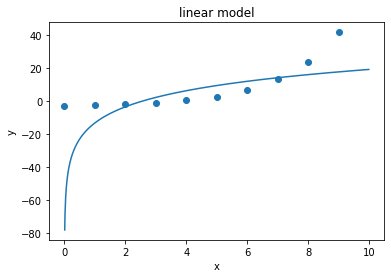

In [12]:
# Plot

plt.scatter(x,y)
z = np.array(range(1000))/100
# linear
#plt.plot(z,a+b*z)

# log
plt.plot(z,a+b*np.log(z))

# exp
#plt.plot(z,a*np.exp(b*z))

# Labelling 

plt.xlabel("x")
plt.ylabel("y")
plt.title("linear model")

# Display

plt.show()